### Homework assignment will go here: 

For 1d, 2d, and 3d:

- Calculate and plot $\sigma^2$ as a function of $n$. 
- Compute a linear fit of $\sigma^2$ as a function of $n$, and also plot that. 
- Compute the diffusion constant $D$ in each of 1d,2d,3d

In [12]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [13]:
import tf_setCPU

In [14]:
# setup walkers
nwalkers = 1000   # number of walkers
nsteps = 5000     # number of steps
n = np.arange(nsteps)   # a numpy array of steps
choices = [-1, 0, 1]   # choices given for each step

# 1-d

In [15]:
# use tf.random to simulate all step choices
steps1d = tf.random.uniform((nsteps,nwalkers),minval=-1,maxval=2,dtype=int64)

In [16]:
# sum all steps up to get the displacement
x1d = tf.math.cumsum(steps1d,axis=0)

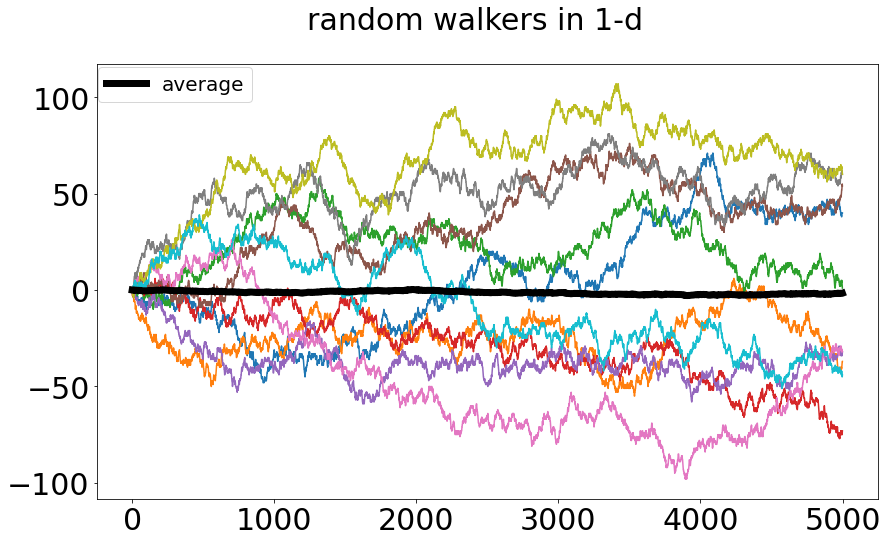

In [25]:
# check the first 10 walkers & average displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(x1d[:,:10])
ax.plot(tf.math.reduce_mean(tf.cast(x1d,dtype=float),axis=1),color='black',linewidth=7,label='average')
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 1-d',fontsize=30)
fig.legend(loc=(0.11,0.81),fontsize=20)
show()

In [18]:
# Now get the average variance over the walkers
sigma1d =tf.math.sqrt(
    tf.math.reduce_mean(tf.cast(x1d**4,dtype=float),axis=1)
        -
        (tf.math.reduce_mean(tf.cast(x1d**2,dtype=float),axis=1))**2
    )


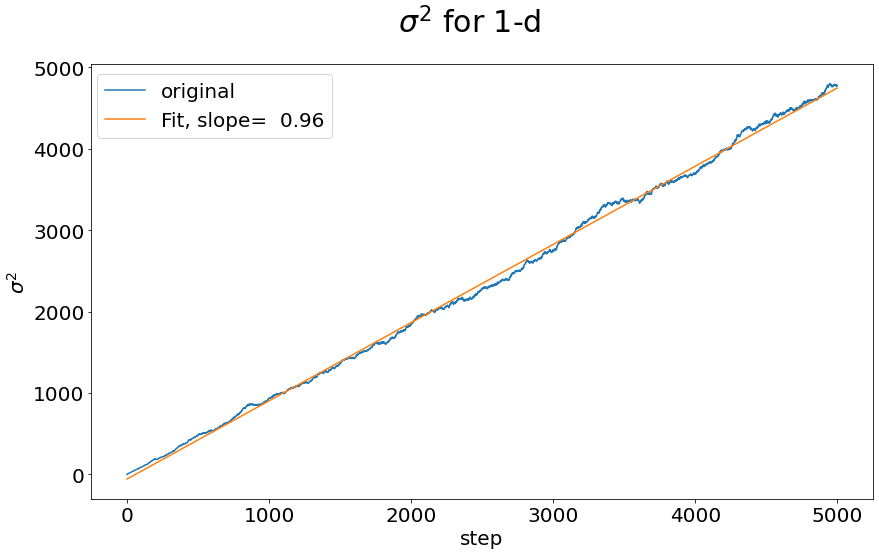

In [26]:
# plot it as a function of n and the fit function
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(sigma1d,label='original')
res1d = np.polyfit(n,sigma1d,1)
ax.plot(res1d[0]*n+res1d[1],label='Fit, slope=%6.2f' % res1d[0])
fig.suptitle(r'$\sigma^2$ for 1-d',fontsize=30) 
fig.legend(loc=(0.11,0.75),fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
show()

In [20]:
print('linear fit for sigma square: sigma^2 = {0:.2f}*n + {1:.2f}'.format(res1d[0],res1d[1]))

linear fit for sigma square: sigma^2 = 0.96*n + -57.83


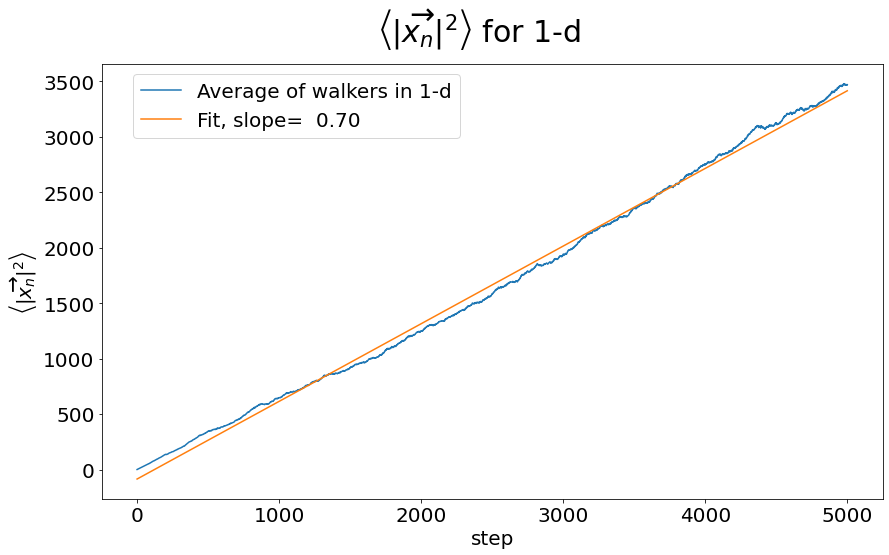

In [27]:
# Plot the mean displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
x2_1d = tf.math.reduce_mean(tf.cast(x1d**2,dtype=float),axis=1)
ax.plot(x2_1d ,  label='Average of walkers in 1-d' )
x2_1dfit = np.polyfit(n, x2_1d,1 )
ax.plot( n, x2_1dfit[0]*n + x2_1dfit[1], label='Fit, slope=%6.2f' % x2_1dfit[0] )
ax.tick_params(axis='both',labelsize=20)
fig.suptitle(r"$\left< {|\overrightarrow{x_n}|}^2 \right>$ for 1-d",fontsize=30)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\left< {|\overrightarrow{x_n}|}^2 \right>$",fontsize=20)
fig.legend(loc=(0.15,0.75),fontsize=20)
show()

We actually see the slope of $\left< {|\overrightarrow{x_n}|}^2 \right>$ is not close to 1. This is due to the three options we have [-1,0,1] here for each step. Thus, 
$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

$$
= 
\left< \sum_{i} s_i^2 \right> =[\frac{1}{3}(-1)^2 + \frac{1}{3}(0)^2 + \frac{1}{3}(1)^2] * n
$$
$$
= \frac{2}{3}n
$$

And the result we have (0.70) is close to the theoretical result 0.6667.

## Theoretical Result

One can solve the confusion equation combined with the boundary condition at infinite to get the solution P(x,t) and for any t, 
$$
P(x)dx = \frac{e^{-\frac{x^2}{4Dt}}}{\sqrt{4\pi Dt}}dx
$$
Then for 1, 2 and 3-d respectively,
$$
\left<x_n^2\right> = \int_{-\infty}^{\infty}P(x)x^2dx = 2Dt
$$

$$
\left<x_n^2+y_n^2\right> = \int_{-\infty}^{\infty}P(x)x^2dx +\int_{-\infty}^{\infty}P(y)y^2dy= 4Dt
$$

$$
\left<r^2\right> = \left<x_n^2+y_n^2+z_n^2\right> = 6Dt
$$

The confusion coefficient D, has a relation with the variance $\sigma^2$:
$$
\sigma^2 = 2Dt*d
$$

where d represents the dimension, while we're also expecting $\sigma^2=td$. Combining these two equations we can find that $D=\frac{1}{2}$ and it's independent on the dimension.

# 2-d

In [169]:
# use tf.random to simulate all step choices
steps2d = tf.random.uniform((nsteps,nwalkers,2),minval=-1,maxval=2,dtype=int64)

In [170]:
# sum all steps up to get the displacement
x2d = tf.math.cumsum(steps2d,axis=0)[:,:,0]
y2d = tf.math.cumsum(steps2d,axis=0)[:,:,1]
r2d = tf.math.sqrt(tf.cast(x2d,dtype=float)**2+tf.cast(y2d,dtype=float)**2)

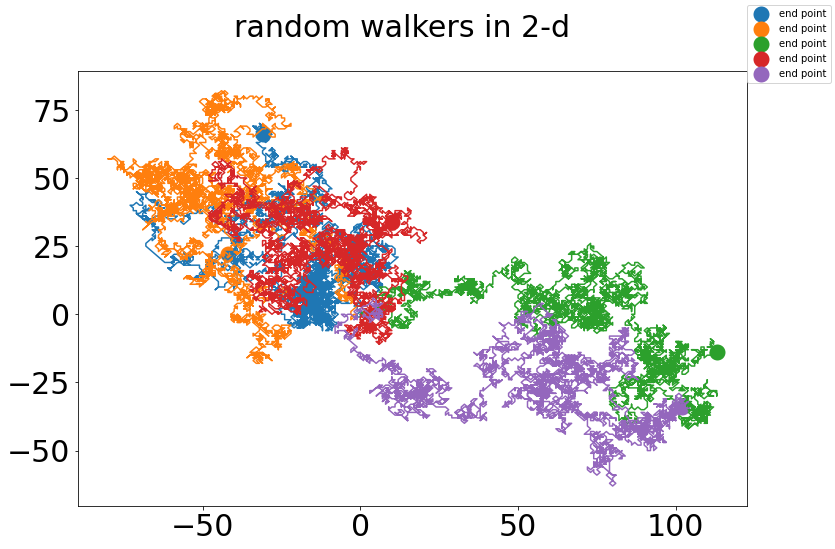

In [171]:
# check the first 5 walkers
fig, ax = plt.subplots(1,1,figsize=(12,8))
for i in np.arange(5):
    ax.scatter(x2d[-1,i],y2d[-1,i],marker='o',linewidth=10,label='end point')
ax.plot(x2d[:,:5],y2d[:,:5])
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 2-d',fontsize=30)
fig.legend(loc=1)
show()

In [172]:
# Now get the average variance over the walkers
sigma2d =tf.math.sqrt(
    tf.math.reduce_mean(r2d**4,axis=1)
        -
        (tf.math.reduce_mean(r2d**2,axis=1))**2
    )

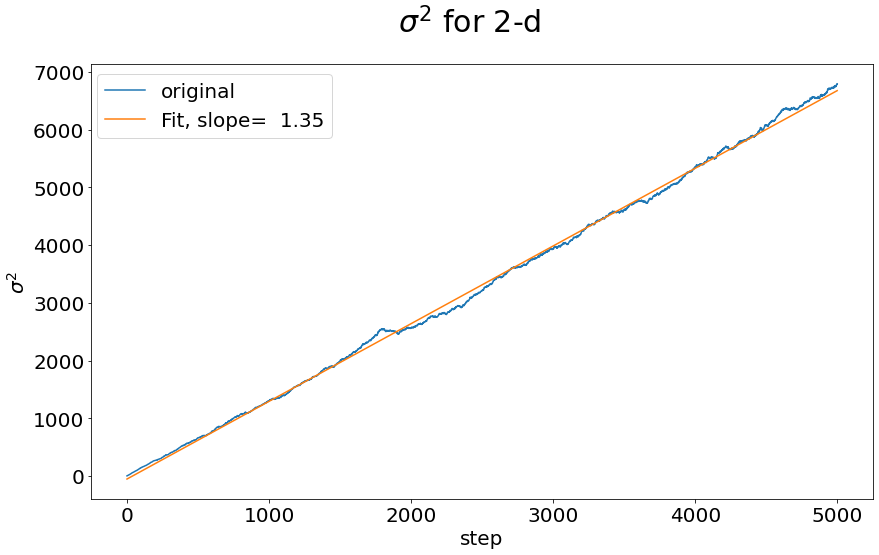

In [173]:
# plot it as a function of n and the fit function
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(sigma2d,label='original')
res2d = np.polyfit(n,sigma2d,1)
ax.plot(res2d[0]*n+res2d[1],label='Fit, slope=%6.2f' % res2d[0])
fig.suptitle(r'$\sigma^2$ for 2-d',fontsize=30) 
fig.legend(loc=(0.11,0.75),fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
show()

In [174]:
print('linear fit for sigma square: sigma^2 = {0:.2f}*n + {1:.2f}'.format(res2d[0],res2d[1]))

linear fit for sigma square: sigma^2 = 1.35*n + -53.83


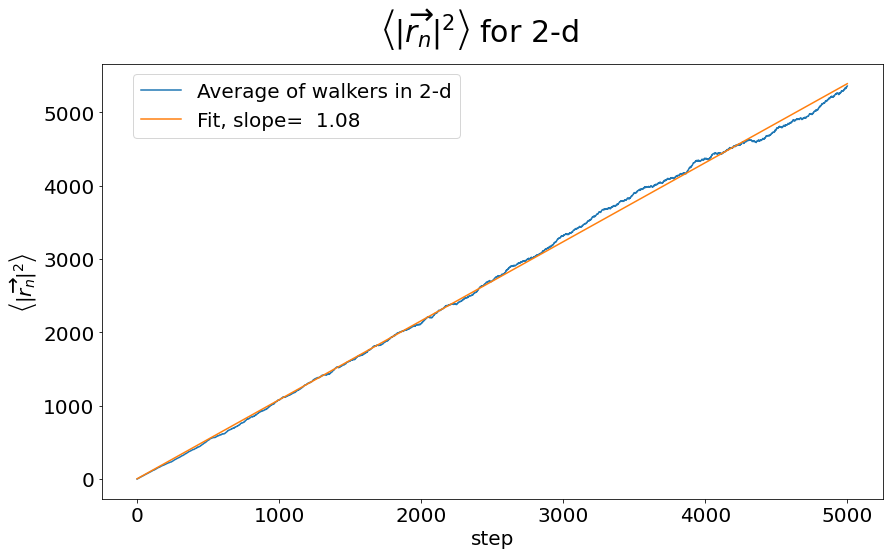

In [175]:
# Plot the mean displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
r2_2d=tf.math.reduce_mean(r2d,axis=1)**2
ax.plot(r2_2d ,  label='Average of walkers in 2-d' )
r2_2dfit = np.polyfit(n, r2_2d,1 )
ax.plot( n, r2_2dfit[0]*n + r2_2dfit[1], label='Fit, slope=%6.2f' % r2_2dfit[0] )
ax.tick_params(axis='both',labelsize=20)
fig.suptitle(r"$\left< {|\overrightarrow{r_n}|}^2 \right>$ for 2-d",fontsize=30)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\left< {|\overrightarrow{r_n}|}^2 \right>$",fontsize=20)
fig.legend(loc=(0.15,0.75),fontsize=20)
show()